In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from ipywidgets import widgets
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN 

In [3]:
df_codis_info = pd.read_csv("data/codis_info.csv")

### PCA (RGB)

In [4]:
ar_codis_RGB = df_codis_info.filter(regex="[RGB]").values
clt = PCA(3)
pca_RGB = clt.fit_transform(ar_codis_RGB)

In [9]:
def plot_pca(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(pca_RGB[:,0], pca_RGB[:,1], pca_RGB[:,2], c=cluster, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(50, azim)

### DBSCAN

In [10]:
dbscan = DBSCAN(eps = 80)
cluster = dbscan.fit_predict(ar_codis_RGB)

In [11]:
pd.Series(cluster).value_counts()

 0    374
 3    274
 1    167
 4    152
 2    102
-1     44
 5      3
dtype: int64

In [12]:
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

##### Clustering 값 확인

In [17]:
from utils.imageprocessing import plot_colors

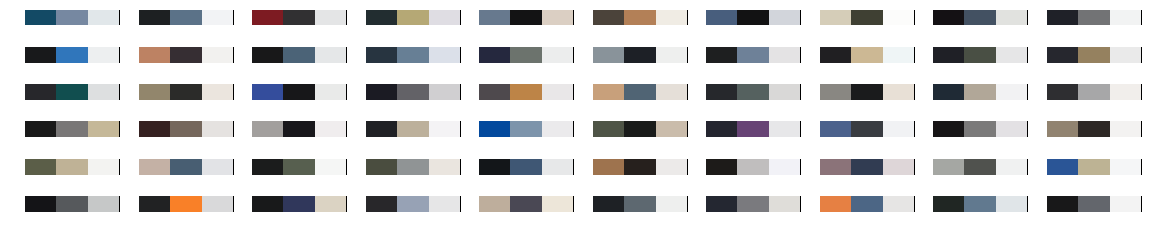

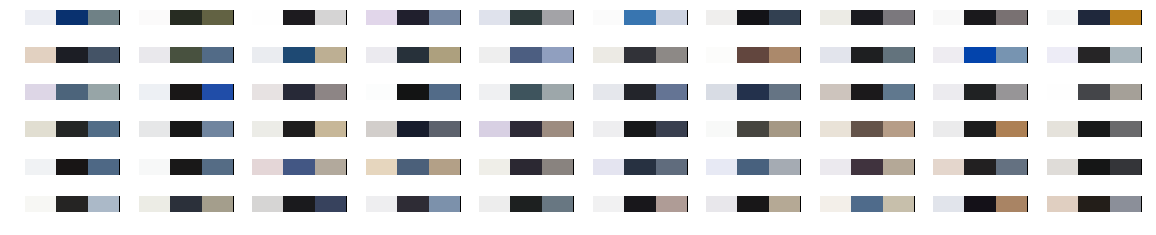

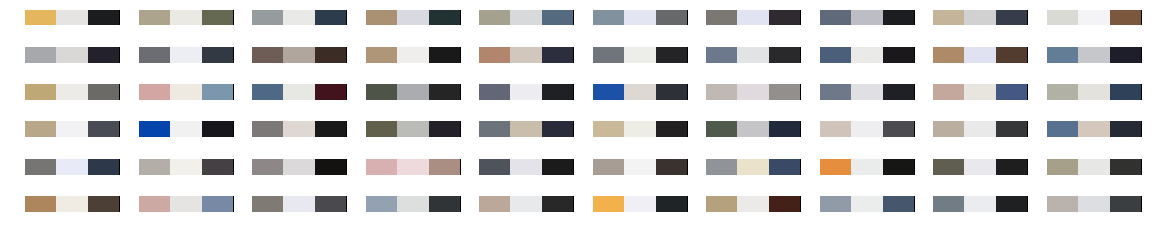

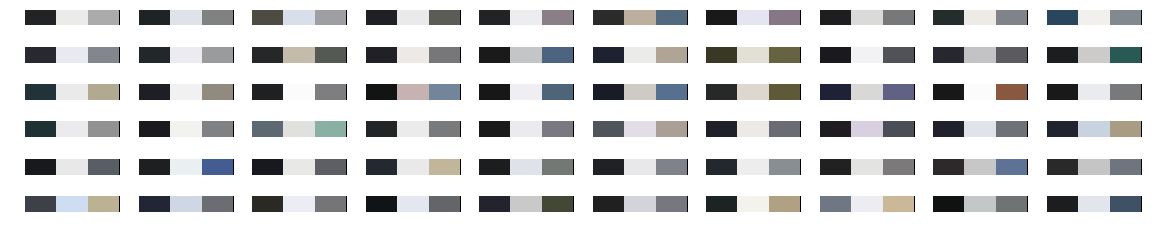

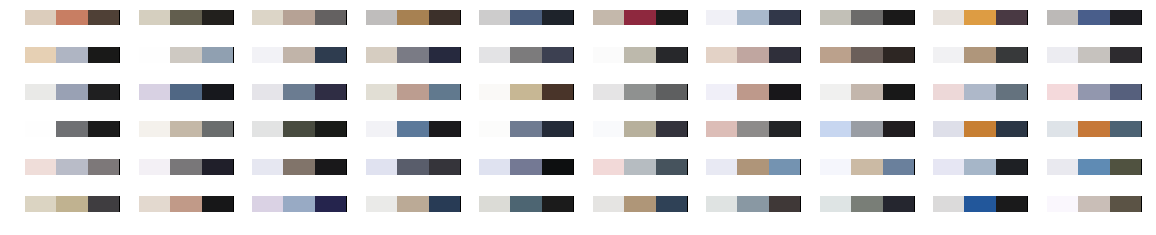

In [30]:
for k in range(5):
    idx_k = np.where(cluster == k)[0]

    k_codis = df_codis_info.iloc[idx_k]

    k_codis_ratio = k_codis.filter(regex="ratio").values
    k_codis_color = k_codis.filter(regex="[RGB]").values
    
    print("="*50)
    
    plt.figure( figsize = (20, 4))    
    for idx in range(60):
        plt.subplot(6, 10, idx+1)
        bar = plot_colors(np.array([0.33, 0.33, 0.33]), k_codis_color[idx].reshape(3,3))
        plt.imshow(bar)
        plt.axis("off")
    plt.show()

- 0 : 어둠 중간 그레 (374)
- 1 : 그레 어둠 중간 (167)
- 2 : 중간 그레 어둠 (104)
- 3 : 어둠 그레 중간 (273)
- 4 : 그레 중간 어둠 (152)

- 메인으로는 검정계통이 제일 좋고, 두번째는 밝은그레이계통이, 세번째는 짙은 그레이가 좋다.

In [32]:
# save cluster info
# for k in range(5):
idx_k = np.where(cluster == 0)[0]
k_codis = df_codis_info.iloc[idx_k]
k_codis.to_csv("data/codis_info_cluster0.csv", index = False)

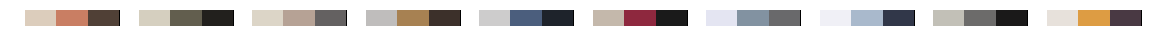

In [25]:
idx_k = np.where(cluster == k)[-1]

k_codis = df_codis_info.iloc[idx_k]

k_codis_ratio = k_codis.filter(regex="ratio").values
k_codis_color = k_codis.filter(regex="[RGB]").values

print("="*50)

plt.figure( figsize = (20, 4))    
for idx in range(10):
    plt.subplot(1, 10, idx+1)
    bar = plot_colors(np.array([0.33, 0.33, 0.33]), k_codis_color[idx].reshape(3,3))
    plt.imshow(bar)
    plt.axis("off")
plt.show()

##### Tag

In [24]:
df_tag = pd.read_csv("data/map.csv")

### cluster별 word cloud 확인

In [25]:
ar_word = np.array(df_tag.columns)

In [26]:
df_word = pd.DataFrame(columns = ["id", "word"])

In [27]:
for idx in range(len(df_tag)):
    word = " ".join(ar_word[df_tag.iloc[idx] >= 1].tolist()[1:])
    user_id = df_tag.iloc[idx]["id_codi"]
    df_word.loc[len(df_word)] = {"id":user_id, "word":word}

In [28]:
df_info = df_codis_info.merge(df_word, how="left", left_on = "name", right_on = "id")

##### df_word word cloud 생성

In [29]:
from wordcloud import WordCloud

In [30]:
from konlpy.tag import *
hannanum = Hannanum()

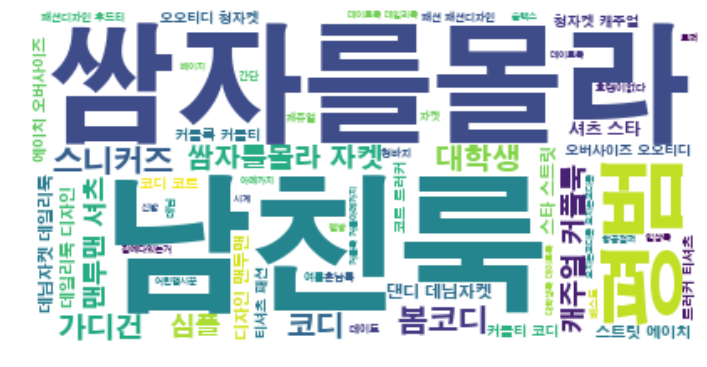

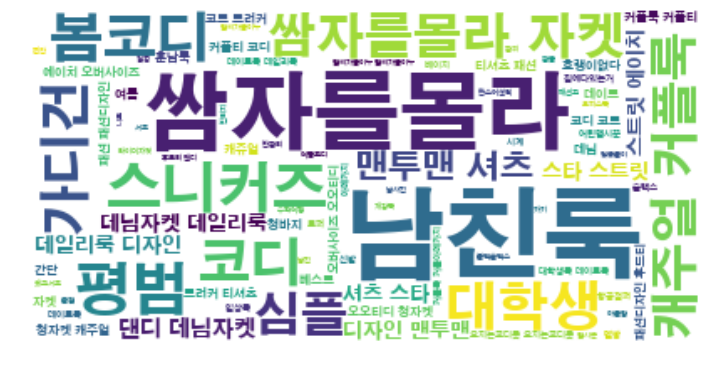

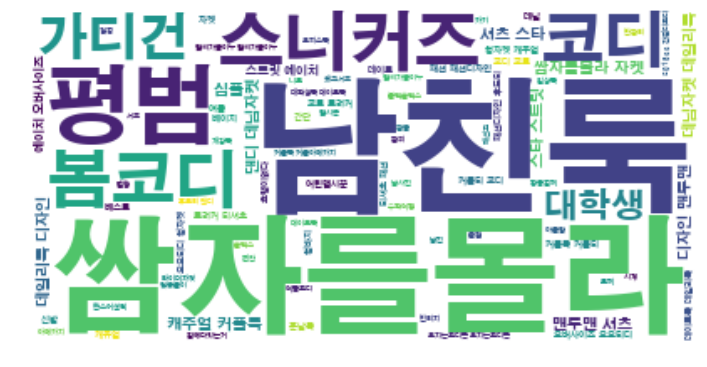

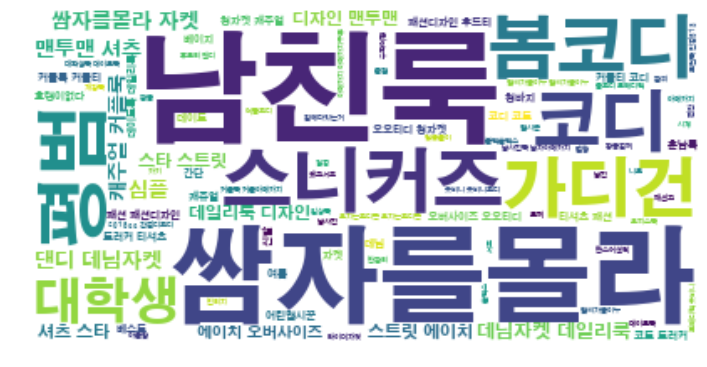

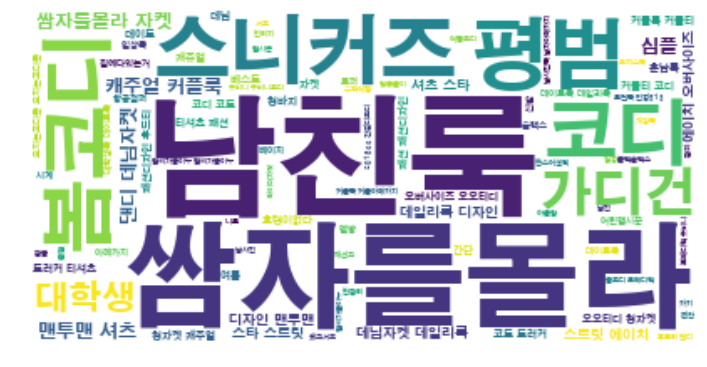

In [31]:
for k in range(5):
    k=0
    idx_k = np.where(cluster == k)[0]
    corpus_k = " ".join(df_info.iloc[idx_k]["word"].tolist())
    
    noun_k = " ".join(hannanum.nouns(corpus_k))
    
    wordcloud = WordCloud(background_color = "white", font_path = "c:/Windows/Fonts/HYGTRE.ttf", max_words = 2000).generate(noun_k)
    
    print("="*50)
    
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

태그 작성자의 취향이 너무 뚜렷하기에 수정이 필요하다